Hierarchical clustering is a method used in machine learning and data mining to group similar data points into clusters based on their characteristics or features. Unlike flat clustering algorithms, which produce a single partition of the data, hierarchical clustering creates a tree-like hierarchical structure of clusters.

In hierarchical clustering, the process starts by treating each data point as its own cluster. Then, pairs of clusters are iteratively merged together based on their similarity until all data points belong to a single cluster or until a specified stopping criterion is met.

There are two main types of hierarchical clustering:

Agglomerative Hierarchical Clustering: This is the most common type of hierarchical clustering. It begins by considering each data point as a separate cluster and then iteratively merges the closest pairs of clusters based on a distance metric until all data points belong to a single cluster. The merging process continues until a stopping criterion, such as a predefined number of clusters or a threshold distance, is reached.

Divisive Hierarchical Clustering: In divisive hierarchical clustering, the process starts with all data points belonging to a single cluster, and then it recursively divides the clusters into smaller clusters based on some dissimilarity criterion until each data point is in its own cluster. Divisive hierarchical clustering is less common than agglomerative clustering and can be computationally expensive, especially for large datasets.

Hierarchical clustering produces a dendrogram, which is a tree-like diagram that illustrates the merging process and shows the hierarchical relationships between clusters. The dendrogram can be cut at different levels to obtain different numbers of clusters, allowing users to explore the data at different granularities.

Hierarchical clustering does not require specifying the number of clusters beforehand, making it suitable for exploratory analysis and visualizing the structure of the data. However, it can be computationally expensive for large datasets, and the choice of distance metric and linkage criteria can significantly affect the resulting clusters.

Overall, hierarchical clustering is a flexible and powerful technique for grouping similar data points into clusters and is widely used in various fields, including biology, image analysis, and social sciences.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

1. `fetch_20newsgroups` is a function from sklearn.datasets to load the '20 newsgroups' text dataset.

2. It uses hierarchical clustering (`ward`, `dendrogram` and `fcluster` from scipy.cluster.hierarchy), which is a method of cluster analysis which seeks to build a hierarchy of clusters.

3. For measuring the similarity between documents, it uses `cosine_similarity` from sklearn.metrics.pairwise.

4. It uses `TfidfVectorizer` from sklearn.feature_extraction.text to convert the raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

5. For text preprocessing, it uses `WordNetLemmatizer` to lemmatize words (bring them to their base form), `stopwords` to remove common words such as 'the', 'is', 'in', etc, and `word_tokenize` to split text into words.

6. The Counter class from collections module is used to count the frequency of elements.

7. The matplotlib, pylab, and numpy libraries are used for plotting and data manipulation.

8. It uses `warnings.filterwarnings("ignore")` to make Python ignore warnings.

9. The `%matplotlib inline` is a magic function in IPython, and this line helps to show your plots in the notebook itself since plots or graphs are rendered in the cell output.

In [2]:
# Downloading a list of stop words and the Wordnet corpus from nltk

nltk.download('stopwords')
stop_words=stopwords.words('english')
stop_words=stop_words+list(string.printable)
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


1. `nltk.download('stopwords')` will download the NLTK package 'stopwords'. Stopwords are words that you want to ignore, so you filter them out when you’re processing natural language text. Standard stop words in English might be 'is', 'and', 'the', etc.

2. `stop_words=stopwords.words('english')` will declare a variable 'stop_words' that is a list of stopwords in English which is available after you've downloaded the stopwords package.

3. `stop_words=stop_words+list(string.printable)` will extend the `stop_words` list by adding all printable characters, which includes digits, ascii_letters (which includes lowercase and uppercase letters), punctuation, and whitespace.

4. `nltk.download('wordnet')` will download the 'wordnet' NLTK package. WordNet is a semantic graph for the English language. It groups English words into sets of synonyms called synsets, provides short definitions, and use terms that relate to those synsets.

5. `lemmatizer=WordNetLemmatizer()` will create an instance of the WordNetLemmatizer class. Lemmatizing is a process of breaking words into their lemmatized base form. For example, 'running' will be lemmatized to 'run', 'better' might be lemmatized to 'good', etc. Packaging this functionality in an instance of a class allows the functionality to be used repeatedly and neatly.

In [3]:
# We do need to specify the categories of news articles we want to fetch by

categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [4]:
# fetch the dataset
news_data = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42, download_if_missing=True)

The above code is fetching a training subset of the 20 Newsgroups dataset. The arguments passed to this function determine what subset of the dataset will be returned:-`subset='train'` means that the returned dataset will be the training subset from the 20 Newsgroups dataset. Other possible values for this parameter are 'test' for the testing subset and 'all' for both the training and testing subsets.

- `categories` is a list of the categories of news articles to be included in the returned dataset. The specific value of this parameter is not given in the above.

- `shuffle=True` means that the returned dataset will be shuffled. Shuffling a dataset is often useful in machine learning to ensure that the order of the data does not affect the performance of the model.

- `random_state=42` sets the seed for the random number generator used to shuffle the dataset. Using this parameter ensures that the same order of shuffling will be used each time the code is run, which is useful for consistent results in testing.

- `download_if_missing=True` means that the dataset will be downloaded if it is not found in the sklearn data directory. If this parameter is set to False and the dataset is not found, a `FileNotFoundError` will be raised.



In [5]:
# To view the data of the fetched content
news_data['data'][:5]

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

In [6]:
# To check the categories of news articles, we do need to insert a new cell
news_data.target

array([0, 0, 1, ..., 0, 1, 0])

0 refers to misc.forsale, 1 refers to sci.electrocnics, and 2 refers to category 'talk.religion,misc'

In [7]:
# to check the categores we are dealing with
news_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [8]:
# We do need to store news_data and the above categories in a pandas dataframe and view it
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [10]:
# To count the occurences iof each category
news_data_df['category'].value_counts()


1    591
0    585
2    377
Name: category, dtype: int64

 we will use a lambda function to extract tokens from each 'text' of the news_data_df DataFrame, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the join function to concatenate a list of words into a single sentence. We use the regular expression (re) to replace anything other than alphabets, digits, and white spaces with blank space.

In [12]:
import nltk
nltk.download('punkt')
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
  for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


`news_data_df['cleaned_text'] =` This creates a new column in the DataFrame called 'cleaned_text'.

`news_data_df['text'].apply(\` will apply a function to each entry in the 'text' column of the DataFrame.

`lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \` will use a lambda function to lower the case of each word, lemmatize the word (normalizes the word by reducing it to its base or root form) and then joins the lemmatized words back into a sentence.

`for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))` will tokenizes the text (breaking the text into individual words), and for each word, it also removes any punctuation or special characters using a regular expression (regex).

`if word.lower() not in stop_words])) will check if the normalized (lowercase) word is not in the list of stop words and removes any that are. Stop words are common words like 'is', 'the', 'and' etc that usually do not contribute to the meaning of a sentence.

In summary, the above code will clean up the text data, allowing better analysis of the data or better results when used in machine learning models.

In [13]:
# Now we need to create a tf-idf matrix and transform it to a dataframe
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


1. `tfidf_model = TfidfVectorizer(max_features=200)`: TfidfVectorizer is a class in the sklearn.feature_extraction.text module; it is used to converts a collection of raw documents into a matrix of TF-IDF features. The "max_features" parameter (set to "200" in this line) is to extract top 200 terms by frequency across the corpus.

2. `tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())`: The ".fit_transform()" function is used to fit the model to 'cleaned_text' data and learn the vocabulary; then it transforms our corpus into a document-term matrix. The '.todense()' function is to convert sparse matrix to dense, since the output of 'fit_transform' produces sparse matrix, but the following code requires a dense one.

3. `tfidf_df.columns = sorted(tfidf_model.vocabulary_)`: The "vocabulary_" attribute (dictionary) of the TfidfVectorizer object is sorted and then used to label the columns of the DataFrame. 'vocabulary_' is a dictionary which converts each token (words in 'cleaned_text') into feature index in the matrix, all values are unique.

4. `tfidf_df.head()`: At the end, the 'head()' function is used to return the first 'n' rows for the object based on position

we'll create a distance matrix by subtracting the cosine similarities of the tf-idf representation of documents. The ward function is used to create a linkage matrix, used in hierarchical clustering

In [15]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist)

dist = 1 - cosine_similarity(tfidf_df)```will compute the dissimilarity (or distance) matrix for the tf-idf vectors(pi-df). The `cosine_similarity` function will calculate how similar the documents (tf-idf vectors) are in terms of their context. The closer the cosine similarity of two documents is to 1, the more similar they are.But for clustering, we need a measure of dissimilarity, i.e., we want high values when documents are not alike and low values when they are similar. Therefore, we subtract the similarity from 1. The resulting matrix (`dist`) represents how different each document is from every other document in the corpus.
```pythonlinkage_matrix = ward(dist)``` will apply the Ward's Method on the dissimilarity matrix to create the hierarchical clustering. The idea behind this method is to minimize the variance within each cluster. Each cell `[i, j]` in the linkage matrix represents a cluster formed by merging cluster `i` and cluster `j`, the third column will contain the distance between these clusters, and the fourth will tell us the number of original samples in this newly merged 'supercluster'. The linkage matrix will be used later to visualize the dendrogram and to decide on a threshold to cut the dendrogram and define the final clusters

We will need to truncate the dendrogram to keep the last 4 clusters. The leaves of a dendrogram refer to the invidual instances that are data points. leaf_rotation denotes the angle by which leaf levels must be rotated. leaf_font_size denotes the font size of the leaf lables

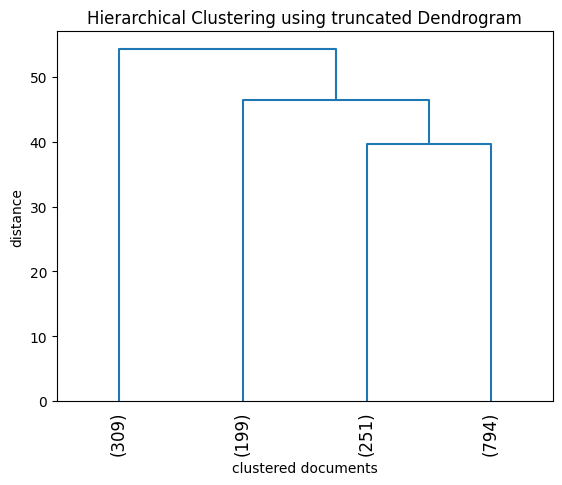

In [16]:
# Truncating the Dendogram truncation to show the last 4 clusters
#Truncating the Dendogram Truncation to show last 4 clusters
plt.title('Hierarchical Clustering using truncated Dendrogram')
plt.xlabel('clustered documents')
plt.ylabel('distance')
dendrogram(
linkage_matrix,
truncate_mode='lastp',# showing only last p clusters after merging
p=4,# p is the number of cluster that should remain after merging
leaf_rotation=90.,
leaf_font_size=12.
)
plt.show()

In [17]:
# use fcluster() function to ontain cluster labels of clusters obtained by hierarchical clustering
k=4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

1. `k=4`: it will simply declare an integer variable `k` and assign it a value of 4. This value represents the number of clusters we want as a result.

2. `linkage_matrix`: This is a matrix that stores the hierarchical clustering. It's usually the result of earlier computations using `scipy.cluster.hierarchy.linkage` function. It  will contain the hierarchical clustering encoded as a linkage matrix.

3. `fcluster(linkage_matrix, k, criterion='maxclust')`: will form flat clusters from the hierarchical clustering defined by the given linkage matrix.

The parameter `k` denote the number of clusters to form. The criterion `'maxclust'` indicates that the clustering must continue until we have `k` flat clusters.

4. `clusters = fcluster(linkage_matrix, k, criterion='maxclust')`: will perform the flat clustering based on the `linkage_matrix` and `k` value, and store the result in `clusters` variable. The `clusters` variable now holds an array of length `n` (where `n` is the number of original observations that were clustered), and for each observation it shows the cluster number to which it belongs.

In summary, the above code will take a linkage matrix that defines a hierarchical clustering, and extracts `k` flat clusters from that hierarchy with the criterion 'maxclust'.

we make use of the crosstab function of pandas to compare the clusters we have obtained with the actual categories of news articles.

In [18]:
news_data_df['obtained_clusters'] = clusters
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].\
            replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,155,0,230,200
sci.electronics,110,1,19,461
talk.religion.misc,44,198,2,133


1. `news_data_df['obtained_clusters'] = clusters`: will create a new column `obtained_clusters` in the `news_data_df` DataFrame which will hold the cluster assignments for each data point in your dataset. The variable `clusters` is expected to have the same length as the number of rows in the DataFrame and holds the cluster ID each data point belongs to.

2. `pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}), news_data_df['obtained_clusters'].replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))`: will create a cross-tabulation of two Series (basically a frequency table). Here's the breakdown: - `news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'})`: will create numerical category IDs 0, 1, 2 in the 'category' column of the DataFrame with their corresponding textual representations ('misc.forsale', 'sci.electronics', 'talk.religion.misc'). - `news_data_df['obtained_clusters'].replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'})`: This also does the same thing, replacing numerical cluster IDs with their label ('cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'). - `pd.crosstab(...)`: This will create the actual frequency table. It will report the count of each combination of 'category' and 'obtained_clusters'.

So, in summary it  will creating a new column to hold cluster assignments, then it's creating a frequency table/report that shows how many times each category was assigned to each cluster.